<a href="https://colab.research.google.com/github/ChandProj/Newsqa/blob/master/Dynet_working_fine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install cython


**https://talbaumel.github.io/blog/attention/**

In [0]:
!pip install git+https://github.com/clab/dynet#egg=dynet

  Cloning https://github.com/clab/dynet to /tmp/pip-install-_f66_cpv/dynet
  Stored in directory: /tmp/pip-ephem-wheel-cache-elkcmg5g/wheels/9d/7c/54/a2d66acfb1330579b24afd1bb8bdadbb99c89a3379c274ff23
Successfully built dynet


**Download the data**

In [0]:
import json
from pprint import pprint
from google.colab import auth
from googleapiclient.discovery import build
import io
from googleapiclient.http import MediaIoBaseDownload
import pickle
auth.authenticate_user()
drive_service = build('drive', 'v3')
def _create_file_request(file_id):
    return drive_service.files().get_media(fileId=file_id)


def _download_response_bytes(request, print_progress=False):
    downloaded = io.BytesIO()
    downloader = MediaIoBaseDownload(downloaded, request)
    
    for status in _progbar(downloader):
        if print_progress:
            print("Downloaded {}/{} bytes".format(status.resumable_progress, status.total_size))
  
    downloaded.seek(0)
    return downloaded.read()

  
def _progbar(downloader):
    done = False
    while done is False:
        status, done = downloader.next_chunk()
        yield status


def get_file_id(name):
    return get_matching_files(name)[0]['id']


def move_from_drive_to_disk(file_names, file_destinations):
    for file_name, dest in zip(file_names, file_destinations):
        file_id = get_file_id(file_name)
        print('Downloading file: "{}"'.format(file_name))
        file_bytes = _download_response_bytes(_create_file_request(file_id), print_progress=True)
        with open(dest, "wb") as f:
            f.write(file_bytes)


def load_pickled_files(file_names):
    for name in file_names:
        yield pickle.load(open(name, "rb"))
        

def get_matching_files(name):
    drive_files_response = _download_response_bytes(drive_service.files().list())
    drive_files_response_dict = json.loads(
        drive_files_response.decode('utf-8')
    )
    drive_files_dict = drive_files_response_dict['files']
  
    matching_records = [
        record
        for record in drive_files_dict
        if record['name'] == name
    ]

    no_records = len(matching_records)
    if no_records == 0:
        raise ValueError('no such file: "{}" on your Google Drive'.format(name))
    elif no_records > 1:
        print('warning: multiple matches for file "{}"'.format(name))
    return matching_records


In [0]:
example_file_name = 'test.csv'
example_file_id = get_file_id(example_file_name)
move_from_drive_to_disk([example_file_name], ['test.csv'])

Downloaded 19718051/19718051 bytes


In [0]:
import csv
with open('test.csv') as csvfile:
    readCSV = csv.reader(csvfile, delimiter=',')
    newRow=[]
    
    for row in readCSV:
      tuple=()
      tuple=(row[1],row[2])
      newRow.append(tuple)
qs=[]
qs=newRow

In [0]:
qs[:2]


[('story_text', 'question'),
 ("-LRB- CNN -RRB- -- Comcast rolled out a Web-based on-demand television and movie service on Tuesday that gives customers access to more than 2,000 hours of television and movies . The move comes as users increasingly are bypassing their TV sets and heading straight to the Web -- both legally and illegally -- to watch their favorite shows . The service , named Fancast XFINITY TV -LRB- formerly called TV Everywhere -RRB- , is the biggest cable industry initiative to keep people from skipping traditional TV service in the United States . `` I watch TV online every day . I find it more convenient than my regular TV ... , '' Michael Heard , a self-employed computer repairman from Atlanta , Georgia , said via e-mail . `` I 'm usually watching TV on one window while reading e-mail or tweets on another . `` And also my time is important , so sitting down and watching a show at 8 or 9 p.m. is n't convenient . Online TV allows me to watch what I want when I want .

In [0]:
len(qs)

5127

In [0]:
5127*(40/100)

2050.8

In [0]:
5127-2050


3077

In [0]:
#remove LRB CNN RRB
import re
l_in=[qs[2][0]]
l_out=[re.sub("[^a-z ,'.!;$%A-Z0-9]+", '', _) for _ in l_in][0]

l_out=l_out.replace('LRB ','').replace(' RRB  ','').replace('CNN','')
l_out


for index,i in enumerate(train_set):
  l_out=[re.sub("[^a-z ,'.!;$%A-Z0-9]+", '', _) for _ in i]
  l_out=l_out.replace('LRB ','').replace(' RRB  ','').replace('CNN','')
  train_set[index]=l_out




  

"NASA wo n't have to maneuver the international space station to dodge a piece of debris from a Sovietera satellite spinning around Earth , the space agency announced Monday . NASA says debris wo n't threaten the international space station , seen here from Endeavour in November 2008 . Mission controllers at the Johnson Space Center in Houston warned earlier that a piece of the Kosmos 1275 was to pass about 12 mile from the space station early Tuesday morning . But after further study , NASA determined no evasive action would be needed , said Paul Dye , flight director for the space shuttle Discovery , which is en route to the station .  The latest tracking information showed it is outside of our area of concern , so the station is going to be right where we expected it to be , '' Dye told reporters at the Johnson Space Center in Houston , Texas . Discovery lifted off from Florida on Sunday for a scheduled docking at 513 p.m. ET Tuesday . The spacecraft is not threatened by the debris 

In [0]:
%matplotlib inline
from random import choice, randrange

EOS = "<EOS>" #all strings will end with the End Of String token
characters = list("abcd")
characters.append(EOS)

int2char = list(characters)
char2int = {c:i for i,c in enumerate(characters)}

VOCAB_SIZE = len(characters)



In [0]:
characters = list("abcd")
characters
int2char = list(characters)
char2int = {c:i for i,c in enumerate(characters)}

In [0]:
st="abcdefghijklmnopqrstuvwxyz"
st=st.upper()
st

'ABCDEFGHIJKLMNOPQRSTUVWXYZ'

In [0]:
char2int

{'a': 0, 'b': 1, 'c': 2, 'd': 3}

In [0]:
#This fnc creates a random "length" string and returns (str , its reverse)
def sample_model(min_length, max_lenth):
    random_length = randrange(min_length, max_lenth)                             # Pick a random length
    random_char_list = [choice(characters[:-1]) for _ in range(random_length)]  # Pick random chars
    random_string = ''.join(random_char_list) 
    return random_string, random_string[::-1]  # Return the random string and its reverse

In [0]:
#Check the random length datas
print(sample_model(4, 5))
print(sample_model(5, 10))

('cbba', 'abbc')
('bdcdd', 'ddcdb')


Now create a dataset, each will  be a random len and its reverse
train: 3000 data
Valid : 50  data
Each str max len=15

In [0]:
MAX_STRING_LEN = 15

train_set = [sample_model(1, MAX_STRING_LEN) for _ in range(5)]
val_set = [sample_model(1, MAX_STRING_LEN) for _ in range(5)]

In [0]:
train_set[:3]

[('bb', 'bb'), ('d', 'd'), ('acca', 'acca')]

In [0]:
type(train_set[0])

tuple

In [0]:
train_set=qs[:5000]
val_set=qs[5000:5127]

In [0]:
#So train set is a tuple , each element as string. So jus format to this tyep and  experiment with no of layers
# To do:
#   see i frnn codes ar ereqd or not

We define a  train  function to optimize a model on our training dataset and **plot training errors** as learning proceeds** over the validation set.**

In [0]:
import matplotlib.pyplot as plt
import dynet as dy
from tqdm import tqdm_notebook as tqdm
def train(network, train_set, val_set, epochs = 20):
    def get_val_set_loss(network, val_set):
        loss = [network.get_loss(input_string, output_string).value() for input_string, output_string in val_set]
        return sum(loss)
    
    train_set = train_set*epochs
    trainer = dy.SimpleSGDTrainer(network.model)
    losses = []
    iterations = []
    for i, training_example in enumerate(tqdm(train_set)):
        input_string, output_string = training_example
        
        loss = network.get_loss(input_string, output_string)
        loss_value = loss.value()
        loss.backward()
        trainer.update()

        # Accumulate average losses over training to plot
        if i%(len(train_set)/100) == 0:
            val_loss = get_val_set_loss(network, val_set)
            losses.append(val_loss)
            iterations.append(i/((len(train_set)/100)))

    plt.plot(iterations, losses)
    plt.axis([0, 100, 0, len(val_set)*MAX_STRING_LEN])
    plt.show() 
    print('loss on validation set:', val_loss)


ModuleNotFoundError: ignored

RNN Model  : can take varying len IP, but cant produce varying len OP

In [0]:
RNN_BUILDER = dy.LSTMBuilder

class SimpleRNNNetwork:
    def __init__(self, rnn_num_of_layers, embeddings_size, state_size):
        self.model = dy.Model()

        # the embedding paramaters
        self.embeddings = self.model.add_lookup_parameters((VOCAB_SIZE, embeddings_size))

        # the rnn
        self.RNN = RNN_BUILDER(rnn_num_of_layers, embeddings_size, state_size, self.model)

        # project the rnn output to a vector of VOCAB_SIZE length
        self.output_w = self.model.add_parameters((VOCAB_SIZE, state_size))
        self.output_b = self.model.add_parameters((VOCAB_SIZE))
    
    def _pre_process(self, string):
        string = list(string) + [EOS]
        return [char2int[c] for c in string]
    
    def _embed_string(self, string):
        return [self.embeddings[char] for char in string]

    def _run_rnn(self, init_state, input_vecs):
        s = init_state

        states = s.add_inputs(input_vecs)
        rnn_outputs = [s.output() for s in states]
        return rnn_outputs
    
    def _get_probs(self, rnn_output):
        probs = dy.softmax(self.output_w * rnn_output + self.output_b)
        return probs
    
    def __call__(self, input_string):
        input_string = self._pre_process(input_string)
        
        dy.renew_cg()
        
        embedded_string = self._embed_string(input_string)
        rnn_state = self.RNN.initial_state()
        rnn_outputs = self._run_rnn(rnn_state, embedded_string)
        return [self._get_probs(rnn_output) for rnn_output in rnn_outputs]

            
    def get_loss(self, input_string, output_string):
        output_string = self._pre_process(output_string)

        probs = self(input_string)
        loss = [-dy.log(dy.pick(p, output_char)) for p, output_char in zip(probs, output_string)]
        loss = dy.esum(loss)
        return loss

    def _predict(self, probs):
        probs = probs.value()
        predicted_char = int2char[probs.index(max(probs))]
        return predicted_char
    
    def generate(self, input_string):
        probs = self(input_string)
        output_string = [self._predict(p) for p in probs]
        output_string = ''.join(output_string)
        return output_string.replace('<EOS>', '')


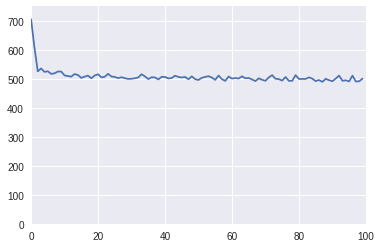

loss on validation set: 500.7399661540985
aaa


In [0]:
RNN_NUM_OF_LAYERS = 2
EMBEDDINGS_SIZE = 4
STATE_SIZE = 128


rnn = SimpleRNNNetwork(RNN_NUM_OF_LAYERS, EMBEDDINGS_SIZE, STATE_SIZE)
train(rnn, train_set, val_set, epochs = 5)
print(rnn.generate('abc'))

In [0]:
class BiRNNNetwork(SimpleRNNNetwork):
    def __init__(self, rnn_num_of_layers, embeddings_size, state_size):
        self.model = dy.Model()

        # the embedding paramaters
        self.embeddings = self.model.add_lookup_parameters((VOCAB_SIZE, embeddings_size))

        # the foreword rnn
        self.fwd_RNN = RNN_BUILDER(rnn_num_of_layers, embeddings_size, state_size, self.model)
        # the backword rnn
        self.bwd_RNN = RNN_BUILDER(rnn_num_of_layers, embeddings_size, state_size, self.model)

        # project the rnn output to a vector of VOCAB_SIZE length
        self.output_w = self.model.add_parameters((VOCAB_SIZE, state_size*2))
        self.output_b = self.model.add_parameters((VOCAB_SIZE))
    
    def __call__(self, input_string):
        input_string = self._pre_process(input_string)
        
        dy.renew_cg()

        embedded_string = self._embed_string(input_string)
        
        #run the foreword RNN
        rnn_fwd_state = self.fwd_RNN.initial_state()
        rnn_fwd_outputs = self._run_rnn(rnn_fwd_state, embedded_string)
        
        #run the backword rnn
        rnn_bwd_state = self.bwd_RNN.initial_state()
        rnn_bwd_outputs = self._run_rnn(rnn_bwd_state, embedded_string[::-1])[::-1]
        
        #concataenate the foreward and backword outputs
        rnn_outputs = [dy.concatenate([fwd_out, bwd_out]) for fwd_out, bwd_out in zip(rnn_fwd_outputs, rnn_bwd_outputs)]
        
        loss = []
        probs = [self._get_probs(rnn_output) for rnn_output in rnn_outputs]
            
        return probs

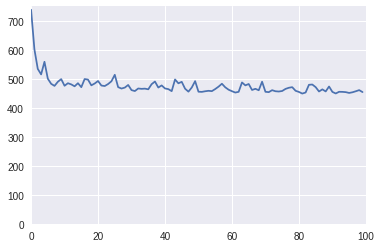

loss on validation set: 454.3471460342407
abb


In [0]:
RNN_NUM_OF_LAYERS = 2
EMBEDDINGS_SIZE = 4
STATE_SIZE = 64


birnn = BiRNNNetwork(RNN_NUM_OF_LAYERS, EMBEDDINGS_SIZE, STATE_SIZE)
train(birnn, train_set, val_set, epochs = 5)
print(birnn.generate('abc'))

In [0]:
class EncoderDecoderNetwork(SimpleRNNNetwork):
    def __init__(self, enc_layers, dec_layers, embeddings_size, enc_state_size, dec_state_size):
        self.model = dy.Model()

        # the embedding paramaters
        self.embeddings = self.model.add_lookup_parameters((VOCAB_SIZE, embeddings_size))

        # the rnns
        self.ENC_RNN = RNN_BUILDER(enc_layers, embeddings_size, enc_state_size, self.model)
        self.DEC_RNN = RNN_BUILDER(dec_layers, enc_state_size, dec_state_size, self.model)

        # project the rnn output to a vector of VOCAB_SIZE length
        self.output_w = self.model.add_parameters((VOCAB_SIZE, dec_state_size))
        self.output_b = self.model.add_parameters((VOCAB_SIZE))

    def _encode_string(self, embedded_string):
        initial_state = self.ENC_RNN.initial_state()

        # run_rnn returns all the hidden state of all the slices of the RNN
        hidden_states = self._run_rnn(initial_state, embedded_string)

        return hidden_states

    def __call__(self, input_string):
        input_string = self._pre_process(input_string)
        
        dy.renew_cg()
        
        embedded_string = self._embed_string(input_string)
        # The encoded string is the hidden state of the last slice of the encoder
        encoded_string = self._encode_string(embedded_string)[-1]

        rnn_state = self.DEC_RNN.initial_state()

        probs = []
        for _ in range(len(input_string)):
            rnn_state = rnn_state.add_input(encoded_string)
            p = self._get_probs(rnn_state.output())
            probs.append(p)
        return probs

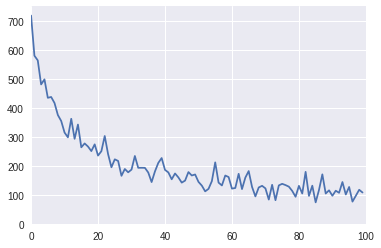

loss on validation set: 107.94813023161532
abcd -> dcba
abcdabcdabcdabcd -> dcbabbcbdaadcaa


In [0]:
ENC_RNN_NUM_OF_LAYERS = 1
DEC_RNN_NUM_OF_LAYERS = 1
EMBEDDINGS_SIZE = 4
ENC_STATE_SIZE = 64
DEC_STATE_SIZE = 64

encoder_decoder = EncoderDecoderNetwork(
    ENC_RNN_NUM_OF_LAYERS, DEC_RNN_NUM_OF_LAYERS, EMBEDDINGS_SIZE, ENC_STATE_SIZE, DEC_STATE_SIZE)
train(encoder_decoder, train_set, val_set)
print('abcd', '->', encoder_decoder.generate('abcd'))
print('abcdabcdabcdabcd', '->', encoder_decoder.generate('abcdabcdabcdabcd'))

In [0]:
short_strings = [sample_model(1, 5) for _ in range(100)]
medium_strings = [sample_model(5, 10) for _ in range(100)]
long_strings = [sample_model(10, 15) for _ in range(100)]

def count_matches(network, val_set):
    matches = [network.generate(input_string)==output_string for input_string, output_string in val_set]
    return matches.count(True)

print('Matches for short strings', count_matches(encoder_decoder, short_strings))
print('Matches for medium strings', count_matches(encoder_decoder, medium_strings))
print('Matches for long strings', count_matches(encoder_decoder, long_strings))

Matches for short strings 100
Matches for medium strings 89
Matches for long strings 28


Attention model

In [0]:
class AttentionNetwork(EncoderDecoderNetwork):
    def __init__(self, enc_layers, dec_layers, embeddings_size, enc_state_size, dec_state_size):
        EncoderDecoderNetwork.__init__(self, enc_layers, dec_layers, embeddings_size, enc_state_size, dec_state_size)

        # attention weights
        self.attention_w1 = self.model.add_parameters((enc_state_size, enc_state_size))
        self.attention_w2 = self.model.add_parameters((enc_state_size, dec_state_size))
        self.attention_v = self.model.add_parameters((1, enc_state_size))

        self.enc_state_size = enc_state_size

    def _attend(self, input_vectors, state):
        attention_weights = []

        w2dt = self.attention_w2 * state.h()[-1]
        for input_vector in input_vectors:
            attention_weight = self.attention_v * dy.tanh(self.attention_w1  * input_vector + w2dt)
            attention_weights.append(attention_weight)
        attention_weights = dy.softmax(dy.concatenate(attention_weights))

        output_vectors = dy.esum(
            [vector * attention_weight 
             for vector, attention_weight 
             in zip(input_vectors, attention_weights)])
        return output_vectors

    def __call__(self, input_string):
        input_string = self._pre_process(input_string)
        
        dy.renew_cg()

        embedded_string = self._embed_string(input_string)
        encoded_string = self._encode_string(embedded_string)

        rnn_state = self.DEC_RNN.initial_state().add_input(dy.vecInput(self.enc_state_size))

        probs = []
        for _ in range(len(input_string)):
            attended_encoding = self._attend(encoded_string, rnn_state)
            rnn_state = rnn_state.add_input(attended_encoding)
            p = self._get_probs(rnn_state.output())
            probs.append(p)
        return probs


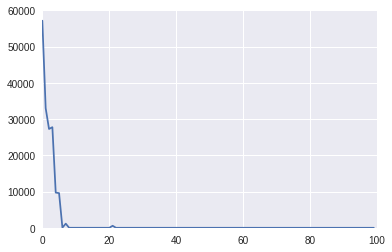

loss on validation set: 0.20155430570343924
dcbadcadcbadcba


In [0]:
ENC_RNN_NUM_OF_LAYERS = 1
DEC_RNN_NUM_OF_LAYERS = 1
EMBEDDINGS_SIZE = 4
ENC_STATE_SIZE = 32
DEC_STATE_SIZE = 32

att = AttentionNetwork(
    ENC_RNN_NUM_OF_LAYERS, DEC_RNN_NUM_OF_LAYERS, EMBEDDINGS_SIZE, ENC_STATE_SIZE, DEC_STATE_SIZE)
train(att, train_set, val_set)
print(att.generate('abcdabcdabcdabcd'))

In [0]:
print('Matches for short strings', count_matches(att, short_strings))
print('Matches for medium strings', count_matches(att, medium_strings))
print('Matches for long strings', count_matches(att, long_strings))

Matches for short strings 100
Matches for medium strings 100
Matches for long strings 100


In [0]:
import numpy as np

class AttentionNetworkWithPrint(AttentionNetwork):
    def __init__(self, enc_layers, dec_layers, embeddings_size, enc_state_size, dec_state_size):
        AttentionNetwork.__init__(self, enc_layers, dec_layers, embeddings_size, enc_state_size, dec_state_size)

        self.should_print = False
        self.att_mat = []

    def _attend(self, input_vectors, state):
        attention_weights = []

        w2dt = self.attention_w2 * state.h()[-1]
        for input_vector in input_vectors:
            attention_weight = self.attention_v * dy.tanh(self.attention_w1 * input_vector + w2dt)
            attention_weights.append(attention_weight)
        attention_weights = dy.softmax(dy.concatenate(attention_weights))
        if self.should_print:
            self.att_mat.append(attention_weights.value())
        output_vectors = dy.esum(
            [vector * attention_weight 
             for vector, attention_weight 
             in zip(input_vectors, attention_weights)])
        return output_vectors

    def _plot_attention(self, matrix, max_weight=None, ax=None):
        """Draw Hinton diagram for visualizing a weight matrix."""
        # I stole this code for matplotlib tutorial
        ax = ax if ax is not None else plt.gca()

        if not max_weight:
            max_weight = 2**np.ceil(np.log(np.abs(matrix).max())/np.log(2))

        ax.patch.set_facecolor('gray')
        ax.set_aspect('equal', 'box')
        ax.xaxis.set_major_locator(plt.NullLocator())
        ax.yaxis.set_major_locator(plt.NullLocator())

        for (x, y), w in np.ndenumerate(matrix):
            color = 'white' if w > 0 else 'black'
            size = np.sqrt(np.abs(w))
            rect = plt.Rectangle([x - size / 2, y - size / 2], size, size,
                                 facecolor=color, edgecolor=color)
            ax.add_patch(rect)

        ax.autoscale_view()
        ax.invert_yaxis()
        plt.show()
    
    def generate_and_plot_attention(self, input_string):
        att.should_print = True
        att.att_mat = []
        output_string = self.generate(input_string)
        self._plot_attention(np.array(att.att_mat))
        att.should_print = False
        att.att_mat = []
        return output_string


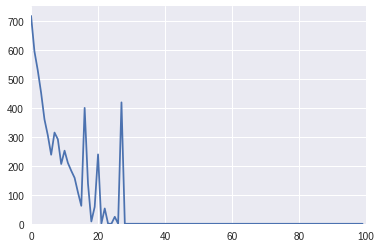

loss on validation set: 0.009547846453642705


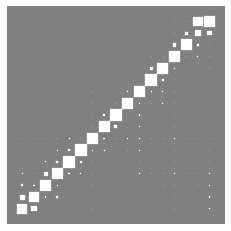

dcbadcbadcbadcba


In [0]:
ENC_RNN_NUM_OF_LAYERS = 1
DEC_RNN_NUM_OF_LAYERS = 1
EMBEDDINGS_SIZE = 4
ENC_STATE_SIZE = 32
DEC_STATE_SIZE = 32

att = AttentionNetworkWithPrint(ENC_RNN_NUM_OF_LAYERS, DEC_RNN_NUM_OF_LAYERS, EMBEDDINGS_SIZE, ENC_STATE_SIZE, DEC_STATE_SIZE)
train(att, train_set, val_set)

att.att_mat = []
print(att.generate_and_plot_attention('abcdabcdabcdabcd'))
